In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [3]:
data = pd.read_csv("Walmart.csv")
df = pd.DataFrame(data)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
date_type = type(df['Date'][0])
store_type = type(df['Store'][0])
weeklySales_type = type(df['Weekly_Sales'][0])
Temp_type = type(df['Temperature'][0])
Fuelprice_type = type(df['Fuel_Price'][0])
cpi_type = type(df['CPI'][0])
unemployement_type = type(df['Unemployment'][0])

print('Date: ',date_type)
print('Store: ',store_type)
print('Weekly Sales: ',weeklySales_type)
print('Temperature: ',Temp_type)
print('Fuel Price: ',Fuelprice_type)
print('CPI: ',cpi_type)
print('Unemployement: ',unemployement_type)

Date:  <class 'str'>
Store:  <class 'numpy.int64'>
Weekly Sales:  <class 'numpy.float64'>
Temperature:  <class 'numpy.float64'>
Fuel Price:  <class 'numpy.float64'>
CPI:  <class 'numpy.float64'>
Unemployement:  <class 'numpy.float64'>


### Finding missing values if exists

In [5]:
has_nulls = df.isnull().values.any()
print("Are there any null values in the DataFrame?")
print(has_nulls)


Are there any null values in the DataFrame?
False


## Finding outliers if exists

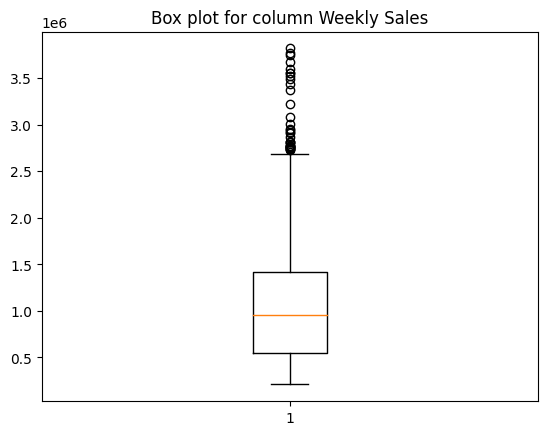

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(df['Weekly_Sales'])
plt.title('Box plot for column Weekly Sales')
plt.show()


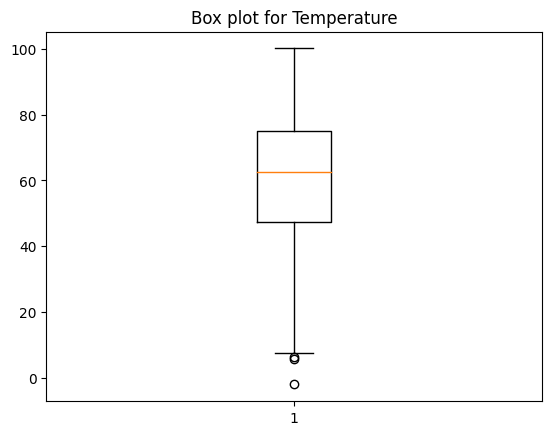

In [7]:
plt.boxplot(df['Temperature'])
plt.title('Box plot for Temperature')
plt.show()

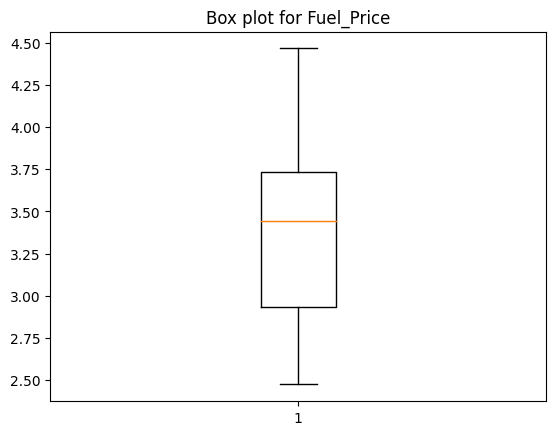

In [8]:
plt.boxplot(df['Fuel_Price'])
plt.title('Box plot for Fuel_Price')
plt.show()

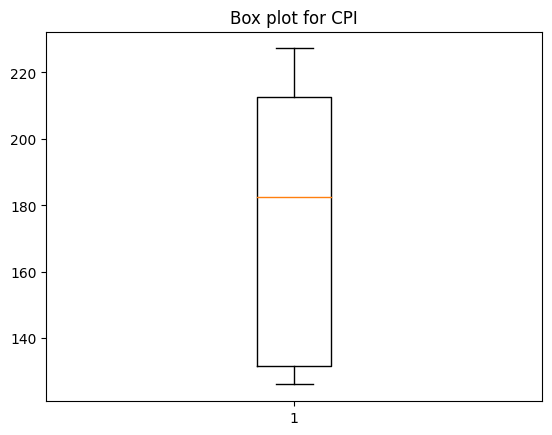

In [9]:
plt.boxplot(df['CPI'])
plt.title('Box plot for CPI')
plt.show()

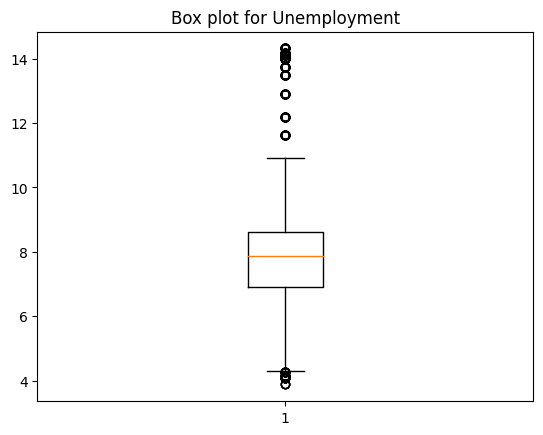

In [10]:
plt.boxplot(df['Unemployment'])
plt.title('Box plot for Unemployment')
plt.show()

In [11]:
print(max(df['Weekly_Sales']))
print(df['Weekly_Sales'].mean())

3818686.45
1046964.8775617715


## Outliers in Weekly Sales

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
## getting the indices of outliers
outliers_iqr = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
outlier_indices_iqr = outliers_iqr.index
print("Outliers based on IQR:")
print(outliers_iqr)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)


Outliers based on IQR:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
761       6  24-12-2010    2727575.18             0        55.07       2.886   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-1

## Outliers in Temperature

In [13]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
910       7  04-02-2011     558027.77             0        -2.06       3.011   
2336     17  07-01-2011    1083071.14             0         6.23       2.891   
3626     26  28-01-2011     817485.14             0         5.54       3.243   

             CPI  Unemployment  
910   191.762589         8.818  
2336  127.191774         6.866  
3626  133.105968         7.907  
Indices of outliers based on IQR:
Index([910, 2336, 3626], dtype='int64')


## Outliers in Fuel Price

In [14]:
Q1 = df['Fuel_Price'].quantile(0.25)
Q3 = df['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['Fuel_Price'] < lower_bound) | (df['Fuel_Price'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Indices of outliers based on IQR:
Index([], dtype='int64')


## Outliers in CPI

In [15]:
Q1 = df['CPI'].quantile(0.25)
Q3 = df['CPI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['CPI'] < lower_bound) | (df['CPI'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Indices of outliers based on IQR:
Index([], dtype='int64')


## Outliers in Unemployment

In [16]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['Unemployment'] < lower_bound) | (df['Unemployment'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
555       4  06-07-2012    2224499.28             0        80.37       3.187   
556       4  13-07-2012    2100252.61             0        76.86       3.224   
557       4  20-07-2012    2175563.69             0        79.14       3.263   
558       4  27-07-2012    2048613.65             0        81.06       3.356   
559       4  03-08-2012    2174514.13             0        83.86       3.374   
...     ...         ...           ...           ...          ...         ...   
5715     40  28-09-2012     919595.44             0        50.98       4.018   
5716     40  05-10-2012    1069112.00             0        57.21       4.027   
5717     40  12-10-2012     982523.26             0        47.35       4.029   
5718     40  19-10-2012     918170.50             0        46.33       4.000   
5719     40  26-10-2012     921264.52             0        49.65       3.917   

             CPI